# 

<font size= 5>                   
    
              +-----------+
              |           |
    datadatada|TADATADATAD|atadatadatadatadatadatadata
              |           |
              +-----------+
    
</font>

# 

<center> <i>See the data from a new perspective of time</i></center>

# 

<font size= 5>                   
    
                           +-----------+
                           |           |
    datadatadatadatadatadat|ADATADATADA|tadatadatadata
                           |           |
                           +-----------+
    
</font>

# 

#### Time, TimE, TIme, timE, tiME, TIME!

You see? (I know, not all combinations used - but okay!) Time, is a beautiful thing. Well, it is imaginary but it exists. 

What am I talking about! Am I learning Einstein now days? No, then why talk on time? I don't know but I love time and here we will see another version to see time in a different way.
<br>
\- <br> 
To save some time, let's get started without wasting time...

# 

In [1]:
import pandas as pd
import numpy as np

# to be mrketty
import pandas_datareader as pdr

In [2]:
REL = pdr.DataReader('RELIANCE.NS', data_source= 'yahoo')
REL = REL['Close']
REL

Date
2016-06-20     490.451019
2016-06-21     488.915558
2016-06-22     485.646545
2016-06-23     485.621796
2016-06-24     471.257935
                 ...     
2021-06-11    2213.149902
2021-06-14    2244.899902
2021-06-15    2250.000000
2021-06-17    2215.649902
2021-06-18    2206.449951
Name: Close, Length: 1231, dtype: float64

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = 20, 10

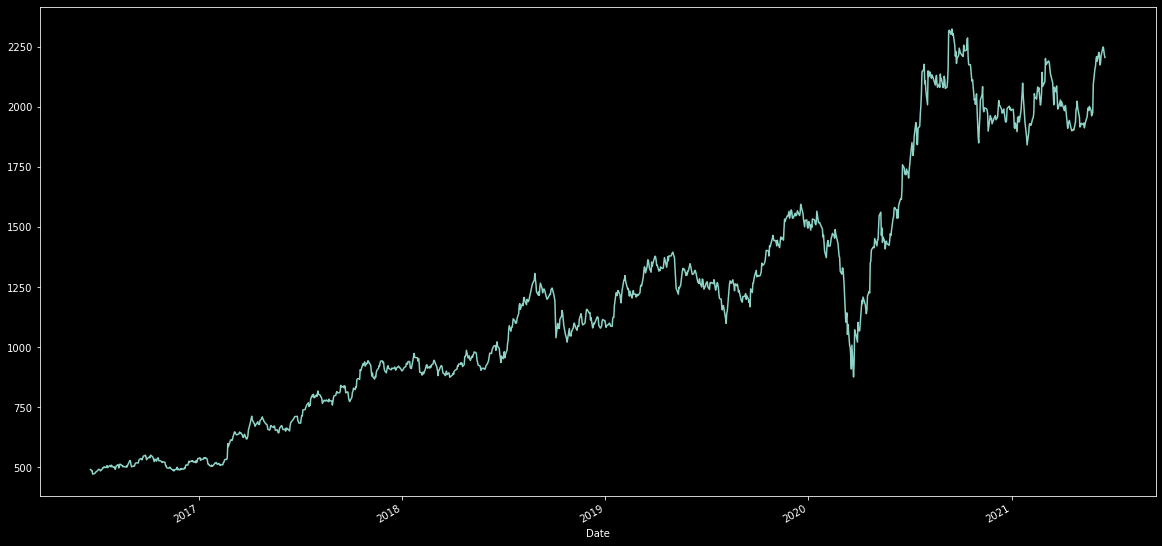

In [4]:
REL.plot();

## ROLLING!

In [5]:
REL.rolling(100)

Rolling [window=100,center=False,axis=0]

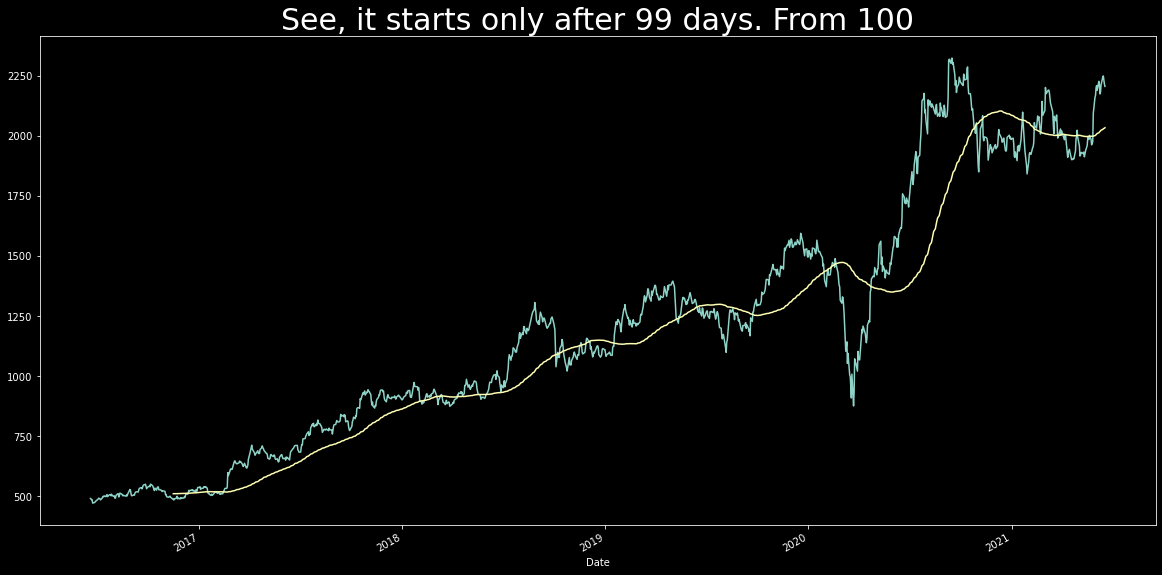

In [6]:
REL.plot()
REL.rolling(100).mean().plot();
plt.title("See, it starts only after 99 days. From 100", fontsize= 30);

Now, what - rolling does

In [7]:
# If I take the window size of 3 (days)
REL.rolling(3).mean()[:10]

Date
2016-06-20           NaN
2016-06-21           NaN
2016-06-22    488.337708
2016-06-23    486.727966
2016-06-24    480.842092
2016-06-27    476.739319
2016-06-28    472.999766
2016-06-29    475.550588
2016-06-30    477.779460
2016-07-01    480.363302
Name: Close, dtype: float64

In [8]:
REL[:3].mean()

488.33770751953125

**Here** it will take...

    1 - 2 - 3 → mean → 3 day's value
    2 - 3 - 4 → mean → 4 day's value
    3 - 4 - 5 → mean → 5 day's value
    ...
    
    And that is the reason why it is not on 1st and 2nd day. 
    Like wise, not in 99 days and why on 100th day.

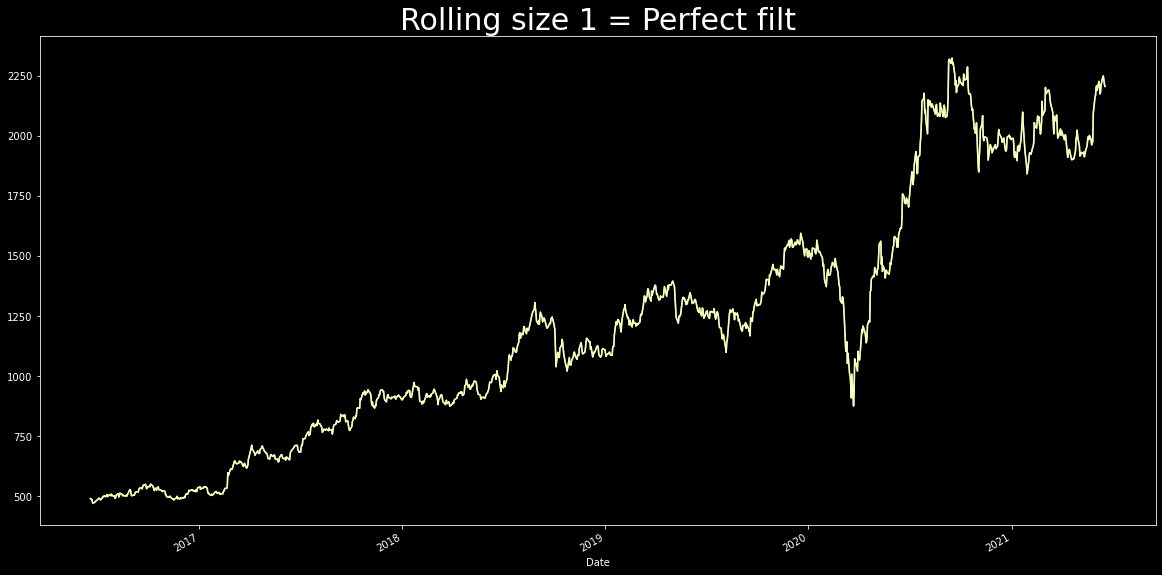

In [9]:
REL.plot()
REL.rolling(1).mean().plot();
plt.title("Rolling size 1 = Perfect filt", fontsize= 30);

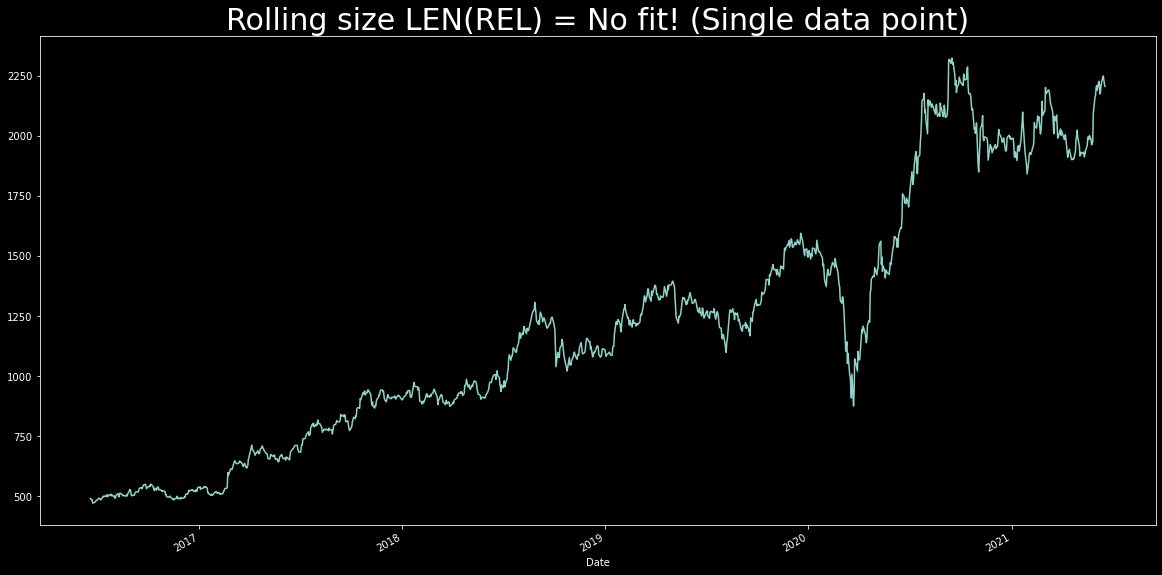

In [10]:
REL.plot()
REL.rolling(len(REL)).mean().plot();
plt.title("Rolling size LEN(REL) = No fit! (Single data point)", fontsize= 30);

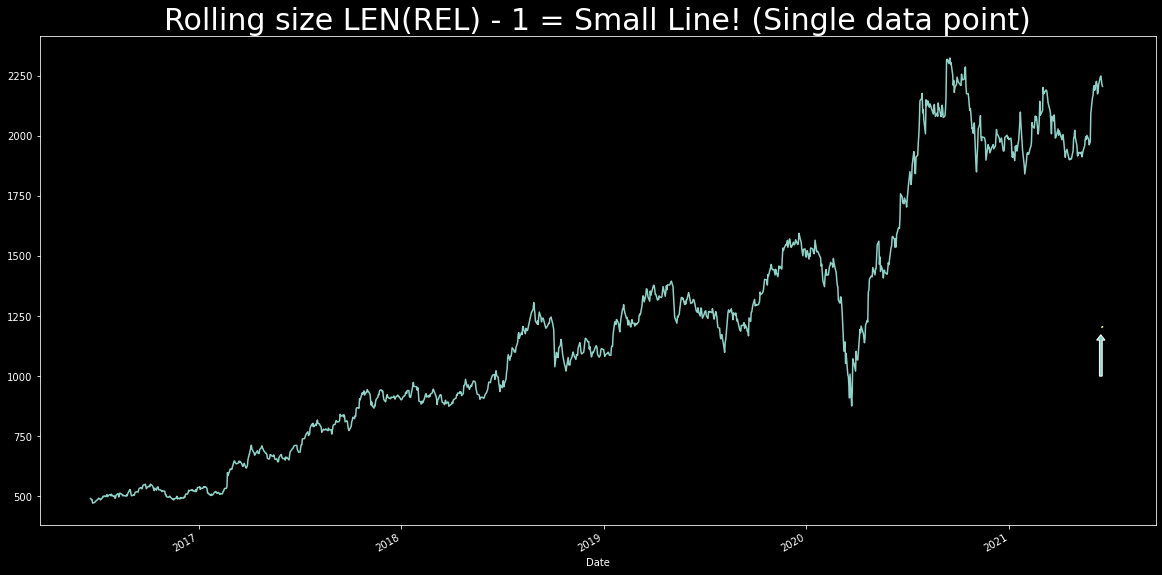

In [11]:
REL.plot()
REL.rolling(len(REL) - 1).mean().plot();
plt.title("Rolling size LEN(REL) - 1 = Small Line! (Single data point)", fontsize= 30);

plt.arrow('15-6-2021', 1000, 0, 150, width= 5)

# 

### Q. Can we achieve the same result with groupby with the knowledge till now?

In [12]:
def get_windows(df, n_rows):
    empty = pd.Series(np.NaN, index= df.index[n_rows-1:])
    for i in range(df.shape[0] - n_rows+1):
        empty.iloc[i] = df.iloc[i:i+n_rows].mean()
    return empty

In [13]:
window_size = 50
(get_windows(REL, window_size) == REL.rolling(window_size).mean().dropna()).all()

True

Not done with groupby, but still - I did it with some simple logic.

#### Of course, 
Rolling is faster than my slow loopy algorithm.

In [173]:
%timeit get_windows(REL, window_size)

313 ms ± 8.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [174]:
%timeit REL.rolling(window_size).mean()

494 µs ± 3.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 

### Continuing...

## → `min_periods` parameter 

This is kind of new thing which is not understood in single go... so we will take a couple of steps and examples to understand it.

In [20]:
# Creating a new ser
ser = pd.Series(np.arange(1, 21),
                index= pd.date_range('6/1/2021', periods= 20))
ser

2021-06-01     1
2021-06-02     2
2021-06-03     3
2021-06-04     4
2021-06-05     5
2021-06-06     6
2021-06-07     7
2021-06-08     8
2021-06-09     9
2021-06-10    10
2021-06-11    11
2021-06-12    12
2021-06-13    13
2021-06-14    14
2021-06-15    15
2021-06-16    16
2021-06-17    17
2021-06-18    18
2021-06-19    19
2021-06-20    20
Freq: D, dtype: int32

#### Normal Way (5 day window) 

In [27]:
# Seeing it side by side ↓ this is rolling part
pd.concat([ser.rename('original'), ser.rolling(5).mean().rename('5 day')], axis= 1)

,original,5 day
2021-06-01,1,NaN
2021-06-02,2,NaN
2021-06-03,3,NaN
2021-06-04,4,NaN
2021-06-05,5,3.0
2021-06-06,6,4.0
2021-06-07,7,5.0
2021-06-08,8,6.0
2021-06-09,9,7.0
2021-06-10,10,8.0


Easy going? <br>
In first 4 days it gave NaN because no other 5 day window found before that, but in the fifth day, it could calculate the 5 day window and then shown right from that.

### min_period Way (5 window, 2 day min_period)

In [30]:
pd.concat([ser.rename('original'), ser.rolling(5, min_periods= 2).mean().rename('5 day - 2 min period')], axis= 1)

,original,5 day - 2 min period
2021-06-01,1,NaN
2021-06-02,2,1.5
2021-06-03,3,2.0
2021-06-04,4,2.5
2021-06-05,5,3.0
2021-06-06,6,4.0
2021-06-07,7,5.0
2021-06-08,8,6.0
2021-06-09,9,7.0
2021-06-10,10,8.0


# Got It.

> Here, it is like MINIMUM window till the GIVEN rolling windows is possible

So first, as we know, in this example - 5 window is only possible when there is the 5th day on the list. But what if I also want to make calculations on the previous days?

So when I kept the `min_periods = 2`, it started keeping the window size 2 and then 3 and 4, then 5 till the 5 is reached. That helps to fill the data when there is larger window size.

(Note: We can't use min_periods > rolling_window/original_window)

\- <br>
So if we keep the min_window = 1 then it will fill all data!

In [31]:
pd.concat([ser.rename('original'), ser.rolling(5, min_periods= 1).mean().rename('5 day - 1 min period')], axis= 1)

,original,5 day - 1 min period
2021-06-01,1,1.0
2021-06-02,2,1.5
2021-06-03,3,2.0
2021-06-04,4,2.5
2021-06-05,5,3.0
2021-06-06,6,4.0
2021-06-07,7,5.0
2021-06-08,8,6.0
2021-06-09,9,7.0
2021-06-10,10,8.0


Noice!

So basically if we apply this logic to REL...

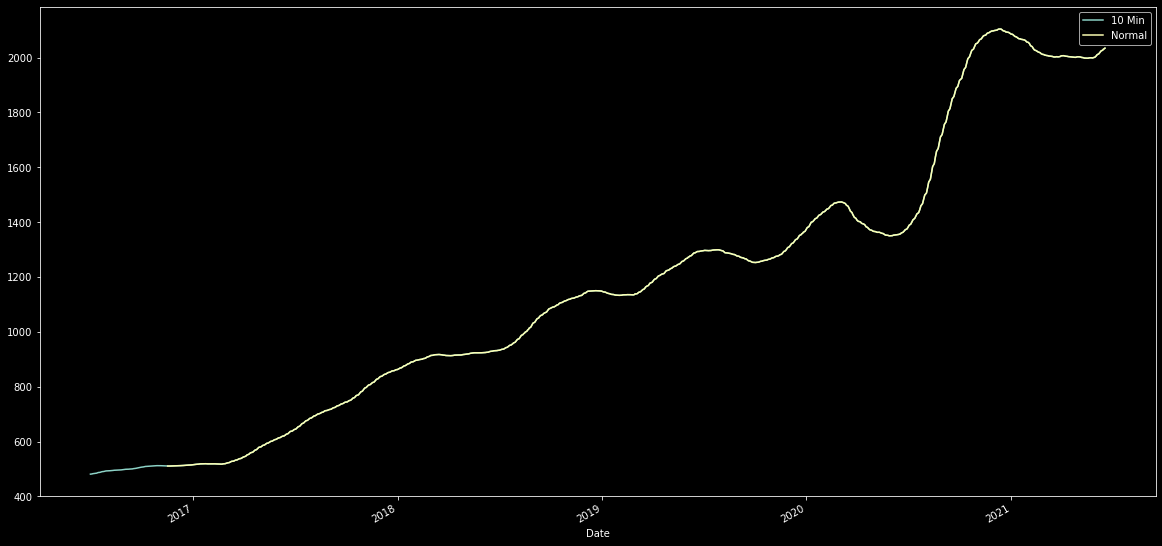

In [41]:
REL.rolling(100, min_periods=10).mean().plot(label= '10 Min')
REL.rolling(100).mean().plot(label= "Normal")

plt.legend();

Everything is same ↑ just min_period starts early.

# 

## → `.expanding()` 
*Another level of insanity!* <br>
_ <br>
• As we have learnt about the working method of *min_period*, based on that - we have the expanding feature. That is used **instead of** rolling - rather than **with rolling**.

(Well we can achieve the same work as **expanding** does with the **combination of rolling and min_periods** - but that will require some manual calculations. We will see both of them)

# 

#### Expanding 

In [46]:
pd.concat([ser.rename('Original'), ser.expanding().mean().rename("Expand")], axis= 1)

,Original,Expand
2021-06-01,1,1.0
2021-06-02,2,1.5
2021-06-03,3,2.0
2021-06-04,4,2.5
2021-06-05,5,3.0
2021-06-06,6,3.5
2021-06-07,7,4.0
2021-06-08,8,4.5
2021-06-09,9,5.0
2021-06-10,10,5.5


### Rolling + min 

In [50]:
pd.concat([ser.rename('Original'), ser.rolling(len(ser), min_periods= 1).mean().rename("Rolling + min")], axis= 1)

,Original,Rolling + min
2021-06-01,1,1.0
2021-06-02,2,1.5
2021-06-03,3,2.0
2021-06-04,4,2.5
2021-06-05,5,3.0
2021-06-06,6,3.5
2021-06-07,7,4.0
2021-06-08,8,4.5
2021-06-09,9,5.0
2021-06-10,10,5.5


See? Both of them are same!

<AxesSubplot:xlabel='Date'>

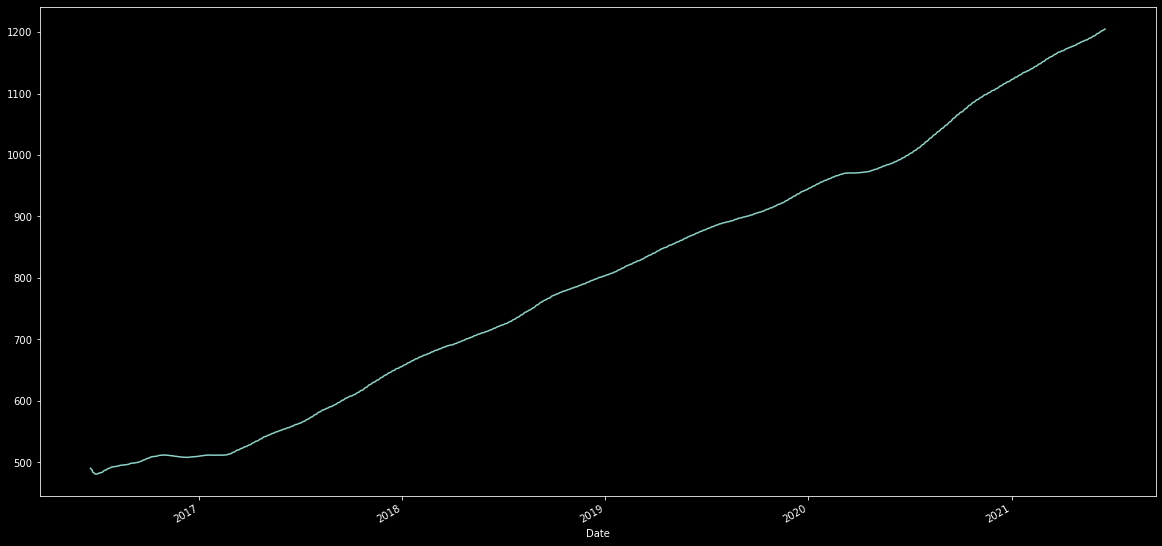

In [53]:
# With REL
REL.expanding().mean().plot()

# 

## → Expanding with some complications 

Expanding **also has**: <br>
```python
# Signature
ser.expanding(min_periods=1, center=None, axis=0)
              # ↑ This guy
              # right here
```


In [59]:
pd.concat([ser.rename('Original'), ser.expanding(3).mean().rename("Expanding")], axis= 1)

,Original,Expanding
2021-06-01,1,NaN
2021-06-02,2,NaN
2021-06-03,3,2.0
2021-06-04,4,2.5
2021-06-05,5,3.0
2021-06-06,6,3.5
2021-06-07,7,4.0
2021-06-08,8,4.5
2021-06-09,9,5.0
2021-06-10,10,5.5


Does the same trick, except here - Expanding has `min_periods = 1` by default while Rolling has `min_periods = window_size`.

# 

## → Other frequencies - rather than just a Day?

In [79]:
pd.concat([ser.rename('original'), ser.rolling('2D').mean().rename("2D")], axis= 1)

,original,2D
2021-06-01,1,1.0
2021-06-02,2,1.5
2021-06-03,3,2.5
2021-06-04,4,3.5
2021-06-05,5,4.5
2021-06-06,6,5.5
2021-06-07,7,6.5
2021-06-08,8,7.5
2021-06-09,9,8.5
2021-06-10,10,9.5


Works. But thing to notice is **When you provide the '2D' or '5D' or whatever - the min_period will be 1** automatically.

String is Called OFFSET. (Not freq here)

Haha (thing) <br>
That does not make any sense to give 2D or 5D... as 2 and 5 as the int would mean **the same thing!** (Except we need to set min_period= 1 then).

**NOTE:** The is a problem while giving the 'W' or 'M/A/Q' in the rolling as the freq. But the time related data like 'T/S/min/H' are working fine.

In [95]:
# Error
REL.rolling('W')

ValueError: <Week: weekday=6> is a non-fixed frequency

In [98]:
# Good
REL.rolling('T')

Rolling [window=60000000000,min_periods=1,center=False,win_type=freq,axis=0]

That would be better if we have some timely data.

In [107]:
index = pd.date_range('25/4/2021', '30/4/2021', freq= 'H')
another_ser = pd.Series(np.arange(1, len(index) + 1),
                index= index)
another_ser

2021-04-25 00:00:00      1
2021-04-25 01:00:00      2
2021-04-25 02:00:00      3
2021-04-25 03:00:00      4
2021-04-25 04:00:00      5
                      ... 
2021-04-29 20:00:00    117
2021-04-29 21:00:00    118
2021-04-29 22:00:00    119
2021-04-29 23:00:00    120
2021-04-30 00:00:00    121
Freq: H, Length: 121, dtype: int32

In [108]:
# Rolling just days
another_ser.rolling(2).mean()

2021-04-25 00:00:00      NaN
2021-04-25 01:00:00      1.5
2021-04-25 02:00:00      2.5
2021-04-25 03:00:00      3.5
2021-04-25 04:00:00      4.5
                       ...  
2021-04-29 20:00:00    116.5
2021-04-29 21:00:00    117.5
2021-04-29 22:00:00    118.5
2021-04-29 23:00:00    119.5
2021-04-30 00:00:00    120.5
Freq: H, Length: 121, dtype: float64

Wai, Wai, Wai --- have you seen that? Just an INT **DOESN't MEAN DAYS**. It is the individual rows.

In [119]:
# Rolling just days (really!)
pd.concat([another_ser[:50], another_ser.rolling('2D').mean()[:50]], axis= 1)

,0,1
2021-04-25 00:00:00,1,1.0
2021-04-25 01:00:00,2,1.5
2021-04-25 02:00:00,3,2.0
2021-04-25 03:00:00,4,2.5
2021-04-25 04:00:00,5,3.0
2021-04-25 05:00:00,6,3.5
2021-04-25 06:00:00,7,4.0
2021-04-25 07:00:00,8,4.5
2021-04-25 08:00:00,9,5.0
2021-04-25 09:00:00,10,5.5


In [117]:
another_ser['2021/4/25':'2021/4/26'].mean()

24.5

It... it does that... let's just leave it as is and focus on next one.

# 

## → Weighted moving average 

In [120]:
# Simple 
REL.rolling(60).mean()

Date
2016-06-20            NaN
2016-06-21            NaN
2016-06-22            NaN
2016-06-23            NaN
2016-06-24            NaN
                 ...     
2021-06-11    2017.850836
2021-06-14    2020.117503
2021-06-15    2022.607501
2021-06-17    2025.279165
2021-06-18    2028.568331
Name: Close, Length: 1231, dtype: float64

In [122]:
# Weighted (Exponential Weighted)
REL.ewm(span= 30).mean()

Date
2016-06-20     490.451019
2016-06-21     489.657698
2016-06-22     488.230553
2016-06-23     487.511745
2016-06-24     483.813610
                 ...     
2021-06-11    2084.163521
2021-06-14    2094.533610
2021-06-15    2104.563700
2021-06-17    2111.730552
2021-06-18    2117.841481
Name: Close, Length: 1231, dtype: float64

<AxesSubplot:xlabel='Date'>

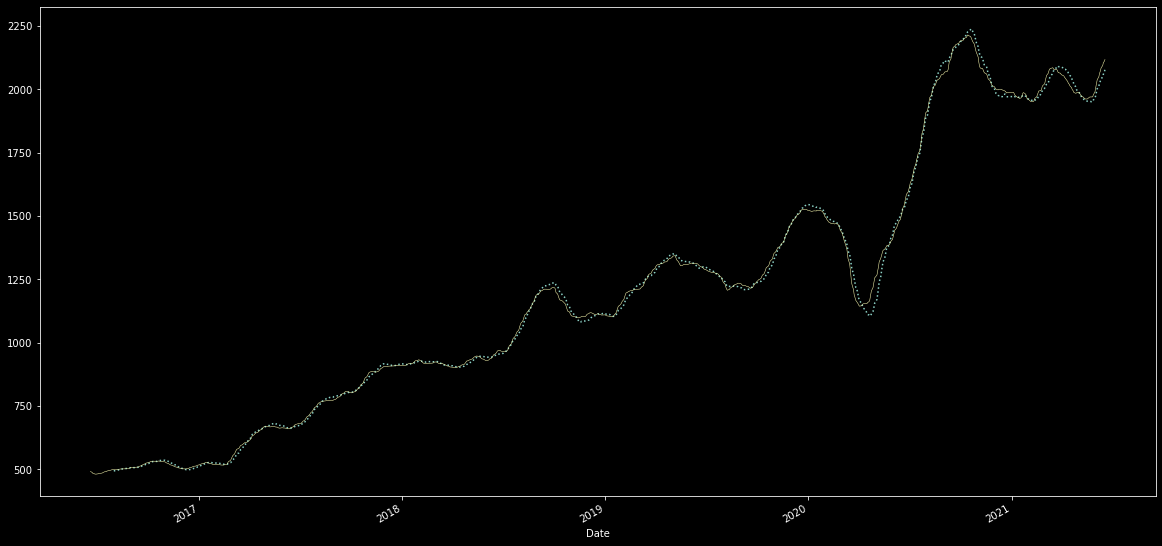

In [131]:
REL.rolling(30).mean().plot(style= ':')
REL.ewm(span= 30).mean().plot(lw= 0.5)

# 

## → Suppose
You wanted to clculate the correlation between IDEA and RELIANCE stocks...

In [150]:
IDEA = pdr.DataReader('IDEA.NS', data_source= 'yahoo')
IDEA = IDEA.Close
IDEA

Date
2016-06-20    62.105808
2016-06-21    61.623432
2016-06-22    61.201355
2016-06-23    61.261654
2016-06-24    60.025566
                ...    
2021-06-11     9.850000
2021-06-14     9.650000
2021-06-15     9.700000
2021-06-17     9.450000
2021-06-18    10.450000
Name: Close, Length: 1231, dtype: float64

In [155]:
REL = pdr.DataReader('RELIANCE.NS', data_source= 'yahoo')
REL = REL.Close
REL

Date
2016-06-20     490.451019
2016-06-21     488.915558
2016-06-22     485.646545
2016-06-23     485.621796
2016-06-24     471.257935
                 ...     
2021-06-11    2213.149902
2021-06-14    2244.899902
2021-06-15    2250.000000
2021-06-17    2215.649902
2021-06-18    2225.649902
Name: Close, Length: 1231, dtype: float64

# 

#### See this approach

In [156]:
REL_pct = REL.pct_change() * 100
REL_pct

Date
2016-06-20         NaN
2016-06-21   -0.313071
2016-06-22   -0.668625
2016-06-23   -0.005096
2016-06-24   -2.957829
                ...   
2021-06-11    1.381122
2021-06-14    1.434607
2021-06-15    0.227186
2021-06-17   -1.526671
2021-06-18    0.451335
Name: Close, Length: 1231, dtype: float64

In [157]:
IDEA_pct = IDEA.pct_change() * 100
IDEA_pct

Date
2016-06-20          NaN
2016-06-21    -0.776700
2016-06-22    -0.684930
2016-06-23     0.098525
2016-06-24    -2.017719
                ...    
2021-06-11    -1.005019
2021-06-14    -2.030465
2021-06-15     0.518137
2021-06-17    -2.577320
2021-06-18    10.582011
Name: Close, Length: 1231, dtype: float64

##### Don't get surprised by seeing this ↓ 

In [210]:
REL_pct.rolling(5).corr(IDEA_pct)

Date
2016-06-20         NaN
2016-06-21         NaN
2016-06-22         NaN
2016-06-23         NaN
2016-06-24         NaN
                ...   
2021-06-11    0.721465
2021-06-14    0.349100
2021-06-15    0.370513
2021-06-17    0.149522
2021-06-18    0.090698
Name: Close, Length: 1231, dtype: float64

Surprised?<br>
Let's see what is happening.

## Here,

    I have taken 5 day window and just that is applied on REL_pct.
    Clear?
    Yes... but how rolling is working without applying any kind of mean or sum?
    
    ↑ To answer,
    Recall how we could iterate over groupby object. Remember?
    
    In the same way, rolling returns the windows and the values in them - without aggregating anything.
    So see this ↓

In [212]:
list(REL_pct[:10].rolling(5))

[Date
 2016-06-20   NaN
 Name: Close, dtype: float64,
 Date
 2016-06-20         NaN
 2016-06-21   -0.313071
 Name: Close, dtype: float64,
 Date
 2016-06-20         NaN
 2016-06-21   -0.313071
 2016-06-22   -0.668625
 Name: Close, dtype: float64,
 Date
 2016-06-20         NaN
 2016-06-21   -0.313071
 2016-06-22   -0.668625
 2016-06-23   -0.005096
 Name: Close, dtype: float64,
 Date
 2016-06-20         NaN
 2016-06-21   -0.313071
 2016-06-22   -0.668625
 2016-06-23   -0.005096
 2016-06-24   -2.957829
 Name: Close, dtype: float64,
 Date
 2016-06-21   -0.313071
 2016-06-22   -0.668625
 2016-06-23   -0.005096
 2016-06-24   -2.957829
 2016-06-27    0.441434
 Name: Close, dtype: float64,
 Date
 2016-06-22   -0.668625
 2016-06-23   -0.005096
 2016-06-24   -2.957829
 2016-06-27    0.441434
 2016-06-28    0.224979
 Name: Close, dtype: float64,
 Date
 2016-06-23   -0.005096
 2016-06-24   -2.957829
 2016-06-27    0.441434
 2016-06-28    0.224979
 2016-06-29    0.950091
 Name: Close, dtype: float64

Took only 10 days, and window of 5. We can clearly see that in there - proper 5 window value starts from 5th time → 20-6-2016 to 24-6-2016.

So now to prove the point. See that it **does the same WINDOW operation with IDEA_pct** making same windows for IDEA and ...

#### *key part ↓*

**FOR EACH WINDOW OF BOTH - RELIANCE AND IDEA, it computes the correlation. And returns to its last date.**

*Always better with example* <br>

    REL - Original  |   IDEA - Original
                    | 
    1-1-21 NaN      |   1-1-21 NaN
    2-1-21 123      |   2-1-21 13 
    3-1-21 321      |   3-1-21 31 
    4-1-21 234      |   4-1-21 24 
    5-1-21 234      |   5-1-21 34 
    6-1-21 442      |   6-1-21 42 
    
    
    Let's say window is of 3. Then...
    
    REL.rolling(2) would make.
    
    REL
    ---
    
    #1
    1-1-21 NaN
    
    #2
    1-1-21 NaN
    2-1-21 123
    
    #3
    1-1-21 NaN
    2-1-21 123
    3-1-21 321
    
    #4
    2-1-21 123
    3-1-21 321
    4-1-21 234
    
    #5
    3-1-21 321
    4-1-21 234
    5-1-21 234
    
    #6
    3-1-21 321
    4-1-21 234
    6-1-21 442 
    
    
    So, doing → REL.rolling(3).corr(IDEA) would do like ↓
    
    REL                IDEA                       RESULT (put on last date)
    ---                ----                       ------
 
    #1                 #1                    
    1-1-21 NaN         1-1-21 NaN  ------------>  1-1-21   NaN
    
    #2                 #2
    1-1-21 NaN         1-1-21 NaN  ------------\
    2-1-21 123         2-1-21 13   ------------/  2-1-21   NaN
    
    #3                 #3
    1-1-21 NaN         1-1-21 NaN -------------\
    2-1-21 123         2-1-21 13  -------------->
    3-1-21 321         3-1-21 31  -------------/  3-1-21   NaN
    
    #4                 #4
    2-1-21 123         2-1-21 13  -------------\
    3-1-21 321         3-1-21 31  -------------->
    4-1-21 234         4-1-21 24  -------------/  4-1-21   0.99
    
    #5                 #5
    3-1-21 321         3-1-21 31  -------------\
    4-1-21 234         4-1-21 24  -------------->
    5-1-21 234         5-1-21 34  -------------/  5-1-21   0.22
    
    #6                 #6
    4-1-21 234         3-1-21 24  -------------\
    5-1-21 234         4-1-21 34  -------------->
    6-1-21 442         6-1-21 42  -------------/  6-1-21   0.83

In [219]:
# See in action
REL_fake = pd.Series([np.nan, 123, 321, 234, 234, 442], 
                     index= pd.date_range('1/1/2021', periods= 6))

IDEA_fake = pd.Series([np.nan, 13, 31, 24, 34, 42], 
                     index= pd.date_range('1/1/2021', periods= 6))

In [220]:
REL_fake

2021-01-01      NaN
2021-01-02    123.0
2021-01-03    321.0
2021-01-04    234.0
2021-01-05    234.0
2021-01-06    442.0
Freq: D, dtype: float64

In [221]:
IDEA_fake

2021-01-01     NaN
2021-01-02    13.0
2021-01-03    31.0
2021-01-04    24.0
2021-01-05    34.0
2021-01-06    42.0
Freq: D, dtype: float64

In [222]:
REL_fake.rolling(3).corr(IDEA_fake)

2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04    0.998334
2021-01-05    0.225018
2021-01-06    0.832240
Freq: D, dtype: float64

# COOL!
IT IS **NOT** COMPLEX. 

Text(0.5, 1.0, 'Rolling 100 Corr (non pct)')

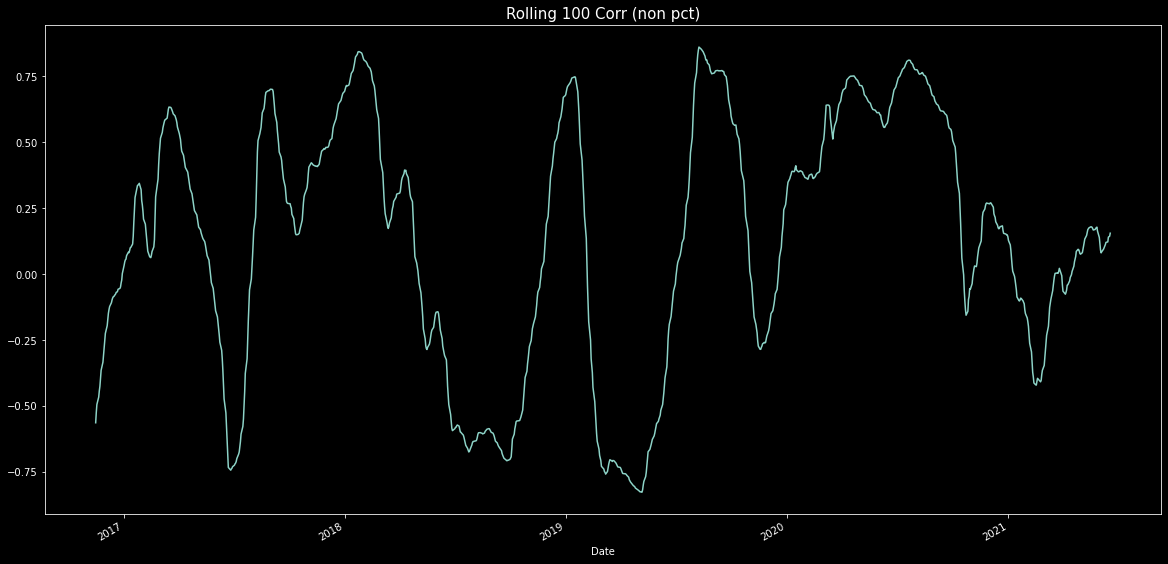

In [227]:
# REL window 100 and corr with IDEA
REL.rolling(100).corr(IDEA).plot()

plt.title("Rolling 100 Corr (non pct)", fontsize= 15)

Text(0.5, 1.0, 'Rolling 100 Corr (with pct)')

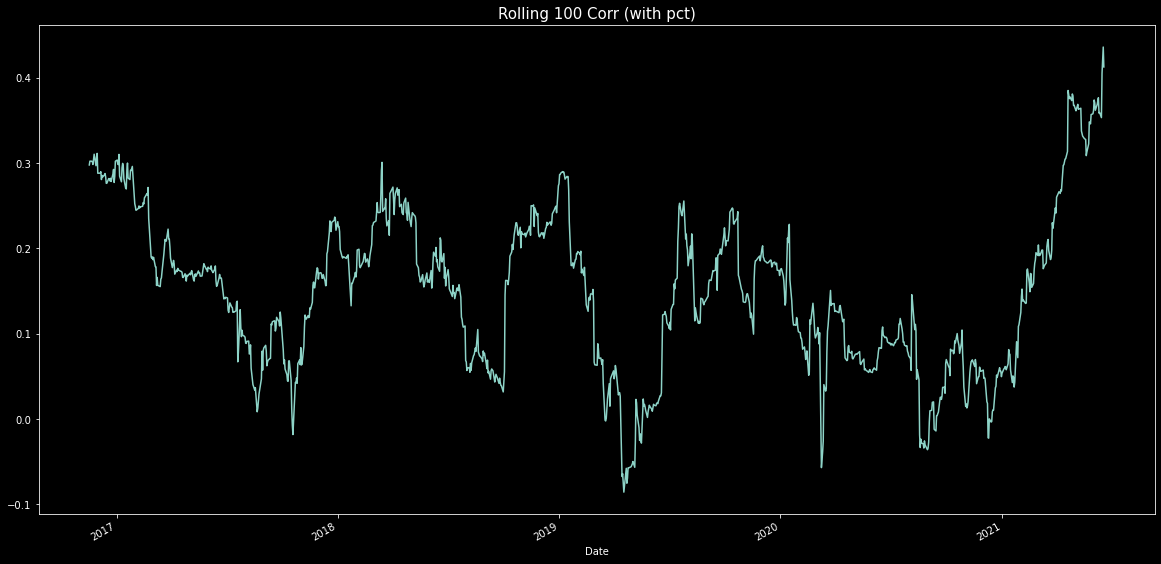

In [228]:
# REL window 100 and corr with IDEA
REL_pct.rolling(100).corr(IDEA_pct).plot()

plt.title("Rolling 100 Corr (with pct)", fontsize= 15)

# 

# That's it!
WITH one tip. <br>
*Tip*: You can give your customized function in windows. Just use `.apply()` and then magic will happend by itself. And remember to return single value from that function. <br>
_ <br>

Now... What? <br> 
Man! We have complented the book's major part - time series! I loved to work with it and am so fascinated with it's power. 

So, next up - we are gonna dive into Advance Pandas. (CEHCK NEW FOLDER)<br>
Stay CURIOUS ∞
                                                       